In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
novartis_data=pd.read_csv('/kaggle/input/usecase-3-csv/usecase_3_.csv')

In [145]:
novartis_data.head()

,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,75209,118014,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,https://clinicaltrials.gov/study/NCT00559130,NaN,COMPLETED,The hypothesis of this study is use of CytoSor...,NO,Acute Respiratory Distress Syndrome|Acute Lung...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2007-01,2007-11,2011-04,2011-06,2007-11-16,NaN,2011-06-07,"Aachen, Germany|Berlin, Germany|Bonn, Germany|...",NaN
1,6356,9987,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,https://clinicaltrials.gov/study/NCT00937664,NaN,TERMINATED,The primary purpose of this study is to find o...,NO,Cancer|Solid Tumors|Advanced Solid Malignancies,...,Allocation: NON_RANDOMIZED|Intervention Model:...,D1040C00008,2009-07,2011-02,2011-02,2009-07-13,NaN,2011-02-07,"Research Site, Minami-ku, Fukuoka, Japan",NaN
2,143427,226012,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,https://clinicaltrials.gov/study/NCT00441597,NaN,COMPLETED,To study the impact of 3 day exposure to atorv...,NO,Ischemia Reperfusion Injury|Cardiovascular Dis...,...,Allocation: RANDOMIZED|Intervention Model: CRO...,atorv01,2007-02,2009-02,2009-03,2007-03-01,NaN,2009-03-17,"Radboud University Nijmegen Medical Centre, Ni...",NaN
3,138885,218952,NCT03296228,Comparison of Dynamic Radiographs in Determini...,https://clinicaltrials.gov/study/NCT03296228,NaN,COMPLETED,The purpose of this study is to identify the f...,NO,Adolescent Idiopathic Scoliosis,...,Observational Model: |Time Perspective: p,UW 16-208,2016-05-01,2018-05-01,2018-12-31,2017-09-28,NaN,2020-05-06,"Duchess of Kent Children's Hospital, Hong Kong...",NaN
4,9769,15382,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,https://clinicaltrials.gov/study/NCT00421603,TACT,COMPLETED,"The proposed protocol is a double-blind, place...",YES,Cocaine Dependence,...,Allocation: RANDOMIZED|Intervention Model: PAR...,#5368|R01DA022217,2007-02,2010-05,2010-05,2007-01-12,2013-02-28,2019-04-24,"STARS, New York, New York, 10032, United States",NaN


In [146]:
novartis_data['Acronym'].value_counts()

Acronym
IMPACT      61
COVID-19    59
SMART       58
RCT         49
FAST        44
            ..
ELATED-3     1
GMGWP        1
TODDY        1
MSPi         1
VIMOPEIL     1
Name: count, Length: 52454, dtype: int64

<Axes: >

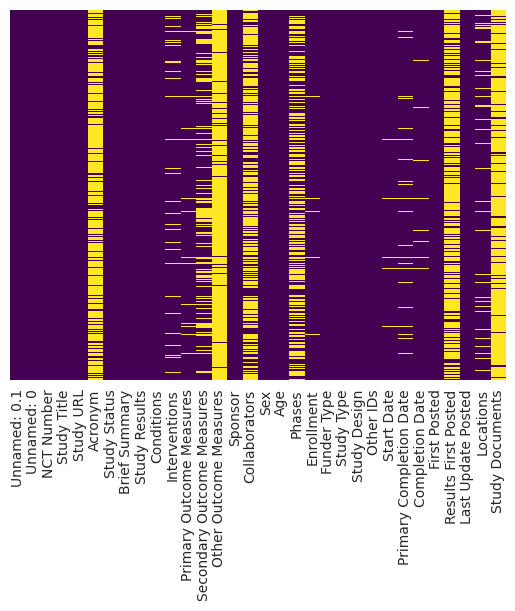

In [147]:
import seaborn as sns
sns.heatmap(novartis_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [148]:
novartis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257577 entries, 0 to 257576
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                257577 non-null  int64  
 1   Unnamed: 0                  257577 non-null  int64  
 2   NCT Number                  257577 non-null  object 
 3   Study Title                 257577 non-null  object 
 4   Study URL                   257577 non-null  object 
 5   Acronym                     63991 non-null   object 
 6   Study Status                257577 non-null  object 
 7   Brief Summary               257577 non-null  object 
 8   Study Results               257577 non-null  object 
 9   Conditions                  257577 non-null  object 
 10  Interventions               234064 non-null  object 
 11  Primary Outcome Measures    247086 non-null  object 
 12  Secondary Outcome Measures  185779 non-null  object 
 13  Other Outcome 

In [149]:
novartis_data["Study Status"].value_counts()

Study Status
COMPLETED     221243
TERMINATED     23496
WITHDRAWN      11512
SUSPENDED       1326
Name: count, dtype: int64

In [150]:
novartis_data["Sponsor"].value_counts()

Sponsor
GlaxoSmithKline                                                  2672
Pfizer                                                           2236
AstraZeneca                                                      2177
National Cancer Institute (NCI)                                  2085
National Institute of Allergy and Infectious Diseases (NIAID)    1708
                                                                 ... 
Minneamrita Therapeutics LLC                                        1
CarThera                                                            1
Ekaterina Pogrebtsova                                               1
Provention Bio, a Sanofi Company                                    1
Evon Medics LLC                                                     1
Name: count, Length: 26239, dtype: int64

In [151]:
novartis_data_copy = novartis_data.loc[:, [
    "Study Status",
    "Brief Summary",
    "Study Results",
    "Conditions",
    "Interventions",
    "Primary Outcome Measures",
    "Secondary Outcome Measures",
    "Sponsor",
    "Sex",
    "Age",
    "Funder Type",
    "Phases",
    "Enrollment",
    "Study Type",
    "Study Design"
]]


In [152]:
novartis_data_copy.dtypes

Study Status                   object
Brief Summary                  object
Study Results                  object
Conditions                     object
Interventions                  object
Primary Outcome Measures       object
Secondary Outcome Measures     object
Sponsor                        object
Sex                            object
Age                            object
Funder Type                    object
Phases                         object
Enrollment                    float64
Study Type                     object
Study Design                   object
dtype: object

In [153]:
novartis_data_copy.head()

,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Study Design
0,COMPLETED,The hypothesis of this study is use of CytoSor...,NO,Acute Respiratory Distress Syndrome|Acute Lung...,DEVICE: CytoSorb Hemoperfusion,Relative IL-6 levels as a percent (%) of basel...,"Ventilator Free Days, Reduction cytokines TNF-...","MedaSorb Technologies, Inc",ALL,"ADULT, OLDER_ADULT",INDUSTRY,NaN,100.00,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...
1,TERMINATED,The primary purpose of this study is to find o...,NO,Cancer|Solid Tumors|Advanced Solid Malignancies,DRUG: AZD7762|DRUG: gemcitabine,Assessment of adverse events (based on CTCAE v...,Pharmacokinetic effect of AZD7762 when adminis...,AstraZeneca,ALL,"ADULT, OLDER_ADULT",INDUSTRY,PHASE1,24.00,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...
2,COMPLETED,To study the impact of 3 day exposure to atorv...,NO,Ischemia Reperfusion Injury|Cardiovascular Dis...,DRUG: atorvastatin,Annexin A 5 targeting in the non dominant then...,"workload during ischemic exercise, workload du...",Radboud University Medical Center,MALE,ADULT,OTHER,PHASE4,30.00,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...
3,COMPLETED,The purpose of this study is to identify the f...,NO,Adolescent Idiopathic Scoliosis,"RADIATION: Flexibility Radiographs (supine, su...",Investigate the flexibility equivalence of dif...,Incorporate these findings into the Lenke Clas...,The University of Hong Kong,ALL,"CHILD, ADULT",OTHER,NaN,134.00,OBSERVATIONAL,Observational Model: |Time Perspective: p
4,COMPLETED,"The proposed protocol is a double-blind, place...",YES,Cocaine Dependence,DRUG: Adderall-XR and Topiramate|DRUG: Placebo,Three Weeks of Continuous Cocaine Abstinence a...,NaN,New York State Psychiatric Institute,ALL,ADULT,OTHER,PHASE2,81.00,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...


<Axes: >

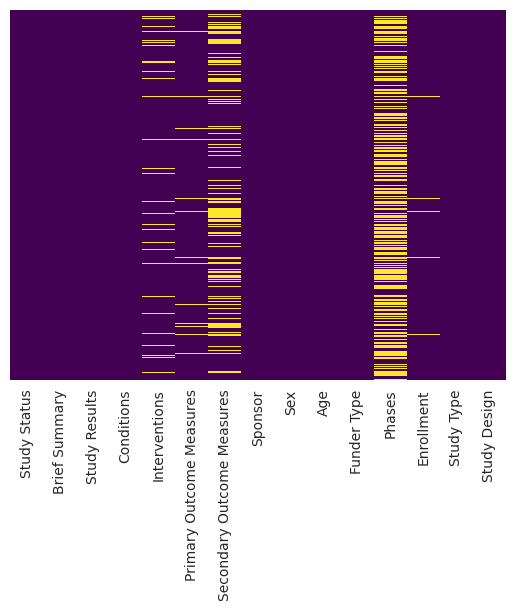

In [154]:
import seaborn as sns
sns.heatmap(novartis_data_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [155]:
# Set Pandas to display float numbers in normal notation
pd.options.display.float_format = '{:,.2f}'.format

# Describe the column again
novartis_data_copy["Enrollment"].describe()


count       254,205.00
mean          4,374.39
std         447,683.73
min               0.00
25%              24.00
50%              60.00
75%             160.00
max     188,814,085.00
Name: Enrollment, dtype: float64

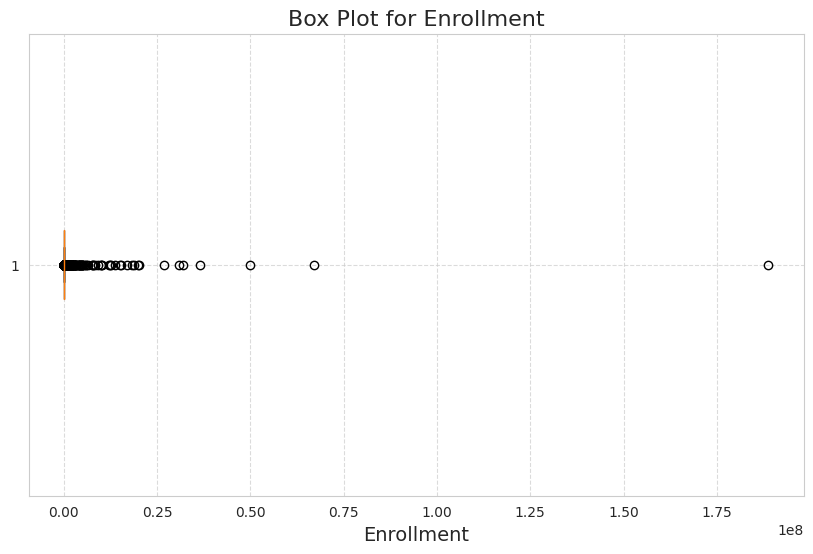

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming novartis_data_copy is already loaded. If not, replace this with your actual DataFrame loading code.
# For demonstration, I'm using a sample data generation process.
# novartis_data_copy = pd.read_csv("your_file.csv")

# Generate the box plot for the 'Enrollment' column
plt.figure(figsize=(10, 6))
plt.boxplot(novartis_data_copy["Enrollment"].dropna(), vert=False, patch_artist=True)
plt.title("Box Plot for Enrollment", fontsize=16)
plt.xlabel("Enrollment", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


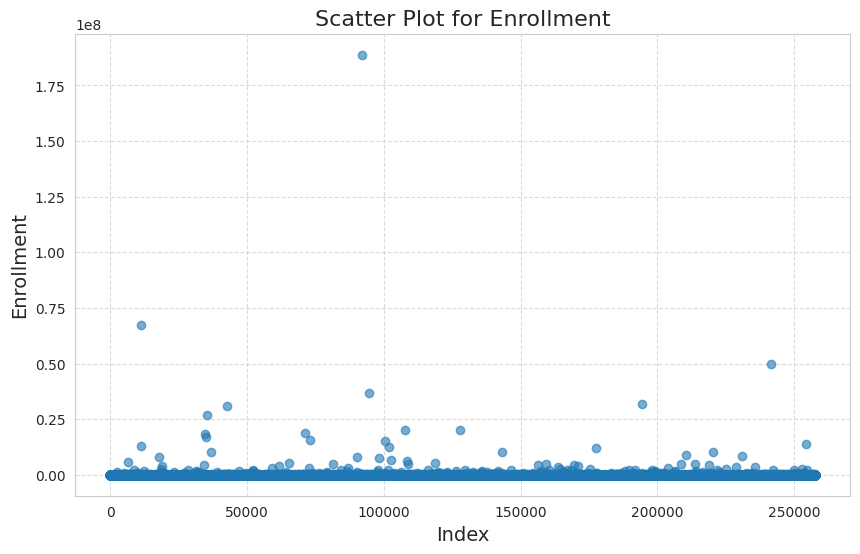

In [157]:
# Assuming novartis_data_copy is loaded. If not, you can replace this with your actual data loading step.
# Generate a scatter plot for the 'Enrollment' column against its index.
plt.figure(figsize=(10, 6))
plt.scatter(range(len(novartis_data_copy["Enrollment"])), novartis_data_copy["Enrollment"], alpha=0.6)
plt.title("Scatter Plot for Enrollment", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Enrollment", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [158]:
#REMOVING OUTLIERS FROM THE ENROLLMENT COLUMN

# Calculate the IQR for the 'Enrollment' column
Q1 = novartis_data_copy['Enrollment'].quantile(0.25)  # 25th percentile
Q3 = novartis_data_copy['Enrollment'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
novartis_data_copy = novartis_data_copy[(novartis_data_copy['Enrollment'] >= lower_bound) &
                                        (novartis_data_copy['Enrollment'] <= upper_bound)]

# Check the dataset after removing outliers
print(novartis_data_copy['Enrollment'].describe())


count   221,184.00
mean         75.52
std          78.65
min           0.00
25%          20.00
50%          48.00
75%         100.00
max         364.00
Name: Enrollment, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


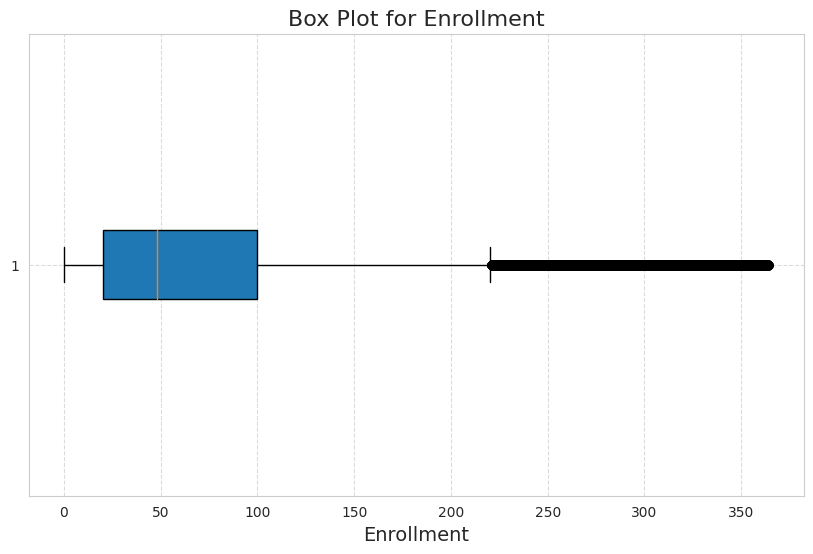

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming novartis_data_copy is already loaded. If not, replace this with your actual DataFrame loading code.
# For demonstration, I'm using a sample data generation process.
# novartis_data_copy = pd.read_csv("your_file.csv")

# Generate the box plot for the 'Enrollment' column
plt.figure(figsize=(10, 6))
plt.boxplot(novartis_data_copy["Enrollment"].dropna(), vert=False, patch_artist=True)
plt.title("Box Plot for Enrollment", fontsize=16)
plt.xlabel("Enrollment", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


<Axes: >

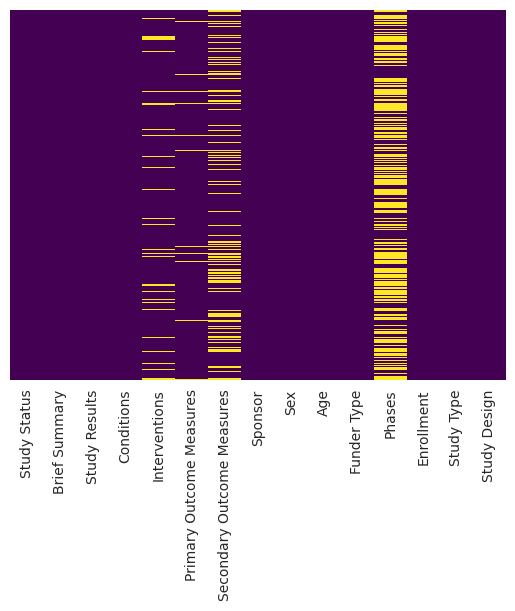

In [160]:
# Treating the outliers on enrollment also helps handle missing values

import seaborn as sns
sns.heatmap(novartis_data_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

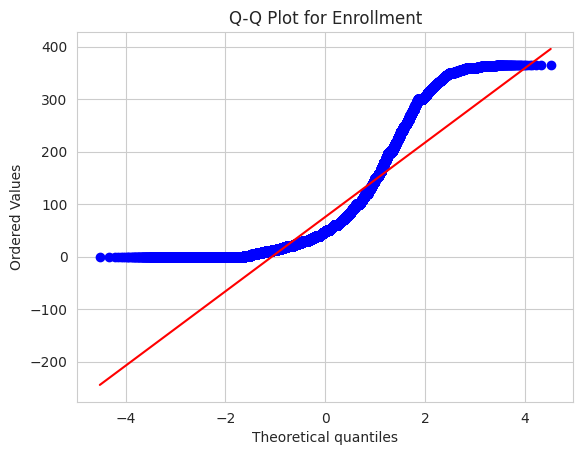

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


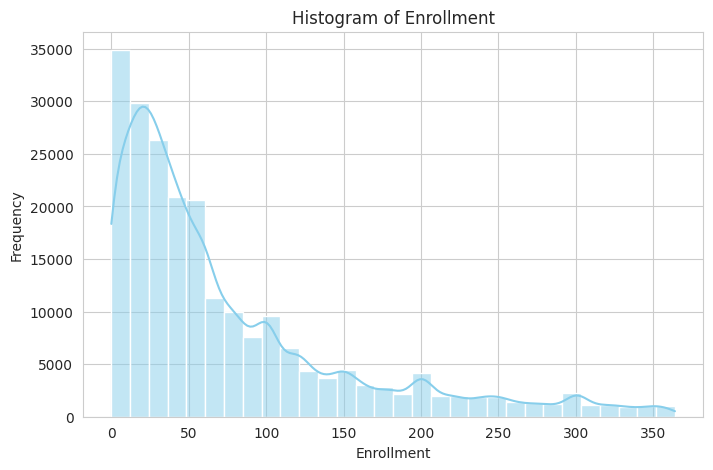

In [161]:
# plotting the Q-Q curve and the histogram plot for Enrollment

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Q-Q Plot for the 'Enrollment' column
stats.probplot(novartis_data_copy['Enrollment'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Enrollment")
plt.show()

# Histogram to visualize skewness
plt.figure(figsize=(8, 5))
sns.histplot(novartis_data_copy['Enrollment'], kde=True, bins=30, color='skyblue')
plt.title("Histogram of Enrollment")
plt.xlabel("Enrollment")
plt.ylabel("Frequency")
plt.show()

**Handling the Skewness of Enrollment using Square root transformation**

In [162]:
# Add a small constant to handle zero or negative values, if any
novartis_data_copy['Enrollment'] = np.sqrt(novartis_data_copy['Enrollment'] + 1e-6)  # Adding 1e-6 as a small constant


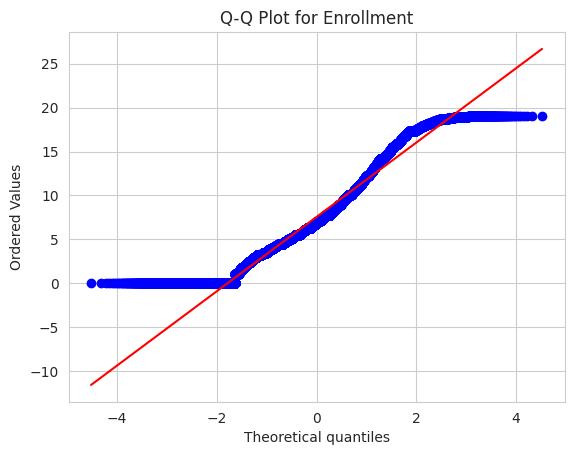

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


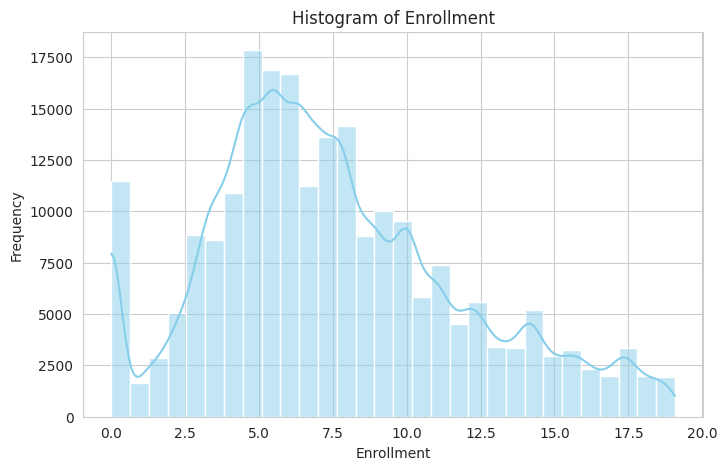

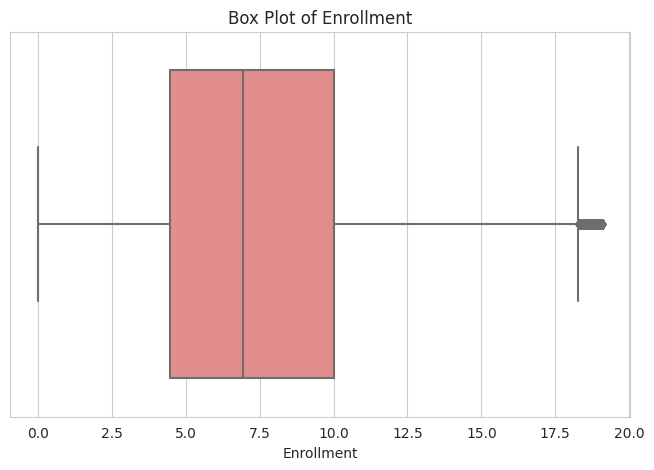

In [163]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Q-Q Plot for the 'Enrollment' column
stats.probplot(novartis_data_copy['Enrollment'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Enrollment")
plt.show()

# Histogram to visualize skewness
plt.figure(figsize=(8, 5))
sns.histplot(novartis_data_copy['Enrollment'], kde=True, bins=30, color='skyblue')
plt.title("Histogram of Enrollment")
plt.xlabel("Enrollment")
plt.ylabel("Frequency")
plt.show()

# Box plot to detect skewness and outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=novartis_data_copy['Enrollment'], color='lightcoral')
plt.title("Box Plot of Enrollment")
plt.show()


In [164]:
novartis_data_copy.head()

,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Study Design
0,COMPLETED,The hypothesis of this study is use of CytoSor...,NO,Acute Respiratory Distress Syndrome|Acute Lung...,DEVICE: CytoSorb Hemoperfusion,Relative IL-6 levels as a percent (%) of basel...,"Ventilator Free Days, Reduction cytokines TNF-...","MedaSorb Technologies, Inc",ALL,"ADULT, OLDER_ADULT",INDUSTRY,NaN,10.00,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...
1,TERMINATED,The primary purpose of this study is to find o...,NO,Cancer|Solid Tumors|Advanced Solid Malignancies,DRUG: AZD7762|DRUG: gemcitabine,Assessment of adverse events (based on CTCAE v...,Pharmacokinetic effect of AZD7762 when adminis...,AstraZeneca,ALL,"ADULT, OLDER_ADULT",INDUSTRY,PHASE1,4.90,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...
2,COMPLETED,To study the impact of 3 day exposure to atorv...,NO,Ischemia Reperfusion Injury|Cardiovascular Dis...,DRUG: atorvastatin,Annexin A 5 targeting in the non dominant then...,"workload during ischemic exercise, workload du...",Radboud University Medical Center,MALE,ADULT,OTHER,PHASE4,5.48,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...
3,COMPLETED,The purpose of this study is to identify the f...,NO,Adolescent Idiopathic Scoliosis,"RADIATION: Flexibility Radiographs (supine, su...",Investigate the flexibility equivalence of dif...,Incorporate these findings into the Lenke Clas...,The University of Hong Kong,ALL,"CHILD, ADULT",OTHER,NaN,11.58,OBSERVATIONAL,Observational Model: |Time Perspective: p
4,COMPLETED,"The proposed protocol is a double-blind, place...",YES,Cocaine Dependence,DRUG: Adderall-XR and Topiramate|DRUG: Placebo,Three Weeks of Continuous Cocaine Abstinence a...,NaN,New York State Psychiatric Institute,ALL,ADULT,OTHER,PHASE2,9.00,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...


**Downsampling Phases to remove biasness in this feature**

In [165]:
novartis_data_copy["Phases"].value_counts()

Phases
PHASE2           29570
PHASE1           26486
PHASE4           16244
PHASE3           14339
PHASE1|PHASE2     6908
PHASE2|PHASE3     2961
EARLY_PHASE1      2151
Name: count, dtype: int64

In [166]:
# Fill null values in the "Phases" column with "Unknown"
novartis_data_copy["Phases"] = novartis_data_copy["Phases"].fillna("Unknown")

# Verify the changes
print(novartis_data_copy["Phases"].value_counts())


Phases
Unknown          122525
PHASE2            29570
PHASE1            26486
PHASE4            16244
PHASE3            14339
PHASE1|PHASE2      6908
PHASE2|PHASE3      2961
EARLY_PHASE1       2151
Name: count, dtype: int64


In [167]:
# Example of downsampling "Unknown"
unknown_sample = novartis_data_copy[novartis_data_copy["Phases"] == "Unknown"].sample(n=30000, random_state=42)
other_data = novartis_data_copy[novartis_data_copy["Phases"] != "Unknown"]
balanced_data = pd.concat([unknown_sample, other_data])

print(balanced_data["Phases"].value_counts())


Phases
Unknown          30000
PHASE2           29570
PHASE1           26486
PHASE4           16244
PHASE3           14339
PHASE1|PHASE2     6908
PHASE2|PHASE3     2961
EARLY_PHASE1      2151
Name: count, dtype: int64


In [168]:
# Calculate the percentage of missing values for each column
missing_percentage = (balanced_data.isnull().sum() / len(balanced_data)) * 100

print(missing_percentage)


Study Status                  0.00
Brief Summary                 0.00
Study Results                 0.00
Conditions                    0.00
Interventions                 3.25
Primary Outcome Measures      2.89
Secondary Outcome Measures   23.38
Sponsor                       0.00
Sex                           0.07
Age                           0.00
Funder Type                   0.00
Phases                        0.00
Enrollment                    0.00
Study Type                    0.00
Study Design                  0.00
dtype: float64


In [169]:
# Extract all unique attributes dynamically from the Study Design column
unique_attributes = set()

# Iterate through the Study Design column to collect all unique attributes
for study_design in balanced_data['Study Design']:
    if pd.notna(study_design):  # Skip NaN values
        for part in study_design.split('|'):  # Split by '|'
            if ':' in part:  # Check if it's a valid key-value pair
                key = part.split(':', 1)[0].strip()  # Extract the key
                unique_attributes.add(key)  # Add the key to the set

# Convert to a sorted list for consistent order
unique_attributes = sorted(unique_attributes)

# Display the unique attributes (optional, for inspection)
print("Unique Attributes in Study Design:", unique_attributes)


Unique Attributes in Study Design: ['Allocation', 'Intervention Model', 'Masking', 'Observational Model', 'Primary Purpose', 'Time Perspective']


In [170]:
def parse_study_design_dynamic(study_design, all_attributes):
    attributes = {attr: "Unknown" for attr in all_attributes}  # Initialize with "Unknown"
    if study_design != "Unknown":  # Avoid parsing "Unknown"
        for part in study_design.split('|'):  # Split by '|'
            if ':' in part:
                key, value = part.split(':', 1)  # Split into key-value pair
                key = key.strip()
                value = value.strip()
                attributes[key] = value  # Assign the value to the corresponding key
    return attributes

# Parse the Study Design column dynamically
parsed_study_design_dynamic = balanced_data['Study Design'].apply(
    lambda x: parse_study_design_dynamic(x, unique_attributes)
)

# Convert the parsed data into a DataFrame and set the same index as the original DataFrame
study_design_dynamic_df = pd.DataFrame(parsed_study_design_dynamic.tolist(), index=balanced_data.index)

# Concatenate the new columns with the original DataFrame
balanced_data = pd.concat([balanced_data, study_design_dynamic_df], axis=1)

# Optional: Drop the original Study Design column if no longer needed
balanced_data.drop(columns=['Study Design'], inplace=True)

# Verify alignment
print("Number of rows in original DataFrame:", len(balanced_data))
print("Number of rows in parsed DataFrame:", len(study_design_dynamic_df))


Number of rows in original DataFrame: 128659
Number of rows in parsed DataFrame: 128659


In [171]:
balanced_data.head()

,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Allocation,Intervention Model,Masking,Observational Model,Primary Purpose,Time Perspective
211241,COMPLETED,The purpose of this study is to compare oxidat...,YES,HIV Infections,NaN,"Total Glutathione, The total glutathione conte...","Catalase Activity, Antioxidant activity of the...",Hospital de Clinicas de Porto Alegre,ALL,ADULT,OTHER,Unknown,5.29,OBSERVATIONAL,Unknown,Unknown,Unknown,,Unknown,p
134970,COMPLETED,Obsessional compulsive disorder (OCD) is a ver...,NO,Obsessive Compulsive Disorder,BEHAVIORAL: Cognitive behavior therapy|BEHAVIO...,Yale-Brown Obsessive-Compulsive Scale (Y-BOCS)...,Vancouver Obsessional Compulsive Inventory (VO...,Centre de Recherche de l'Institut Universitair...,ALL,"ADULT, OLDER_ADULT",OTHER,Unknown,10.54,INTERVENTIONAL,RANDOMIZED,PARALLEL,SINGLE (OUTCOMES_ASSESSOR),Unknown,TREATMENT,Unknown
88399,TERMINATED,Metabolic syndrome and hyperuricemia were both...,NO,Hyperuricemia|Metabolic Syndrome|Left Ventricu...,DIAGNOSTIC_TEST: hyperuricemia,Left ventricle diastolic dysfunction with elev...,"high-sensitivity C-reactive protein, determine...","National Defense Medical Center, Taiwan",ALL,"ADULT, OLDER_ADULT",OTHER,Unknown,8.19,OBSERVATIONAL,Unknown,Unknown,Unknown,,Unknown,p
197115,COMPLETED,Clinical management of cochlear implant (CI) r...,YES,"Hearing Loss, Sensorineural|Hearing Loss, Bila...","DEVICE: Cochlear Implant (CI)-CI500 series, CI...",Number of Participants Who While Using the Fin...,NaN,Cochlear,ALL,"ADULT, OLDER_ADULT",INDUSTRY,Unknown,3.87,INTERVENTIONAL,NA,SINGLE_GROUP,NONE,Unknown,SUPPORTIVE_CARE,Unknown
30457,COMPLETED,"This prospective, randomized study,control stu...",NO,Laparoscopic Renal Surgery|Pain Management|Ner...,PROCEDURE: single-injection QLB(quadratus lumb...,"cumulative morphine consumption, within 48 pos...",The pain scores determined by the numeric rati...,Cui Xulei,ALL,"CHILD, ADULT, OLDER_ADULT",OTHER,Unknown,5.48,INTERVENTIONAL,RANDOMIZED,PARALLEL,"DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)",Unknown,SUPPORTIVE_CARE,Unknown


In [172]:
# List of columns for which you want value counts
columns_to_analyze = [
    "Allocation", 
    "Intervention Model", 
    "Masking", 
    "Observational Model", 
    "Primary Purpose", 
    "Time Perspective"
]

# Apply value_counts to each column and display the results
value_counts_per_column = {col: balanced_data[col].value_counts() for col in columns_to_analyze}

# Display the value counts for each column
for col, counts in value_counts_per_column.items():
    print(f"Value counts for '{col}':\n{counts}\n")


Value counts for 'Allocation':
Allocation
RANDOMIZED        73935
NA                27579
NON_RANDOMIZED    15344
Unknown            9653
                   2148
Name: count, dtype: int64

Value counts for 'Intervention Model':
Intervention Model
PARALLEL        62535
SINGLE_GROUP    36952
CROSSOVER       12797
Unknown          9653
SEQUENTIAL       3180
                 2313
FACTORIAL        1229
Name: count, dtype: int64

Value counts for 'Masking':
Masking
NONE                                                                       65899
QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)    14239
DOUBLE (PARTICIPANT, INVESTIGATOR)                                         10540
Unknown                                                                     9653
SINGLE (PARTICIPANT)                                                        4720
TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)                           4392
SINGLE (OUTCOMES_ASSESSOR)                        

In [173]:
balanced_data = balanced_data.drop(columns=['Sponsor', 'Observational Model', 'Time Perspective'])

<Axes: >

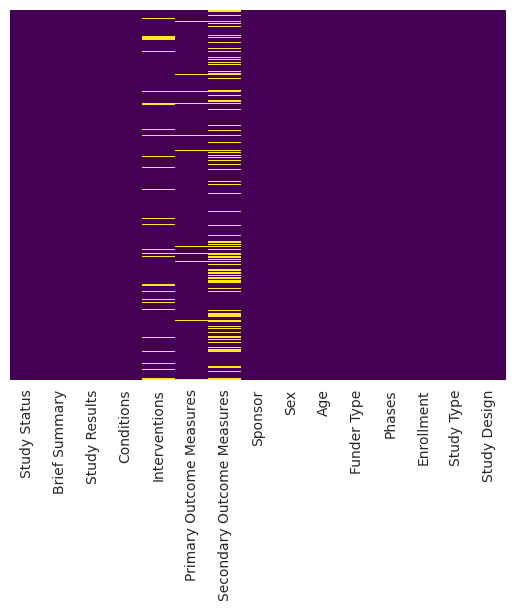

In [174]:
import seaborn as sns
sns.heatmap(novartis_data_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [175]:
# filling the missing values of remaining textual columns with "No info provided"

import pandas as pd

# Replace missing values in textual columns with a placeholder
placeholder_text = "No information provided"

balanced_data['Interventions'] = balanced_data['Interventions'].fillna(placeholder_text)
balanced_data['Primary Outcome Measures'] = balanced_data['Primary Outcome Measures'].fillna(placeholder_text)
balanced_data['Secondary Outcome Measures'] = balanced_data['Secondary Outcome Measures'].fillna(placeholder_text)

<Axes: >

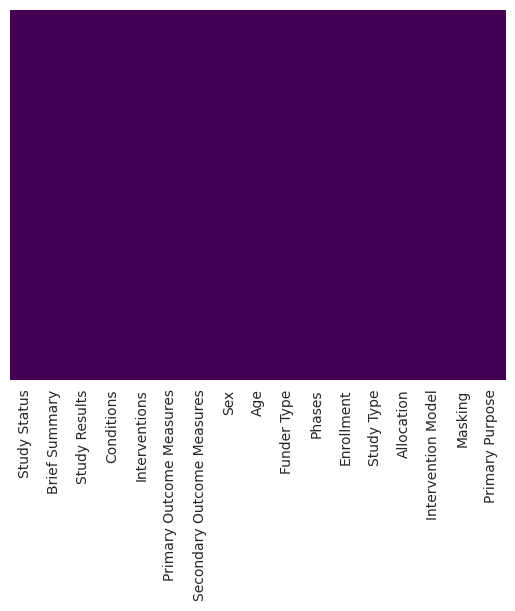

In [176]:
import seaborn as sns
sns.heatmap(balanced_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [177]:
balanced_data = balanced_data.drop(columns=['Brief Summary', 'Conditions', 'Interventions', 'Primary Outcome Measures', 'Secondary Outcome Measures'])

In [178]:
balanced_data.head()

,Study Status,Study Results,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Allocation,Intervention Model,Masking,Primary Purpose
211241,COMPLETED,YES,ALL,ADULT,OTHER,Unknown,5.29,OBSERVATIONAL,Unknown,Unknown,Unknown,Unknown
134970,COMPLETED,NO,ALL,"ADULT, OLDER_ADULT",OTHER,Unknown,10.54,INTERVENTIONAL,RANDOMIZED,PARALLEL,SINGLE (OUTCOMES_ASSESSOR),TREATMENT
88399,TERMINATED,NO,ALL,"ADULT, OLDER_ADULT",OTHER,Unknown,8.19,OBSERVATIONAL,Unknown,Unknown,Unknown,Unknown
197115,COMPLETED,YES,ALL,"ADULT, OLDER_ADULT",INDUSTRY,Unknown,3.87,INTERVENTIONAL,NA,SINGLE_GROUP,NONE,SUPPORTIVE_CARE
30457,COMPLETED,NO,ALL,"CHILD, ADULT, OLDER_ADULT",OTHER,Unknown,5.48,INTERVENTIONAL,RANDOMIZED,PARALLEL,"DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)",SUPPORTIVE_CARE


In [179]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Assuming balanced_data is your existing DataFrame
# Step 1: Identify the categorical columns (excluding 'Allocation' if it has custom encoding)
categorical_columns = balanced_data.select_dtypes(include=['object']).columns

# Step 2: Apply Label Encoding to categorical columns, excluding 'Allocation'
label_encoders = {}  # To store label encoders for inverse transformation if needed
for col in categorical_columns:
    if col != 'Allocation':  # Skip 'Allocation' for custom encoding
        # Fill missing values with a placeholder (e.g., 'Unknown') before encoding
        balanced_data[col] = balanced_data[col].fillna("Unknown")

        # Initialize and fit the label encoder
        le = LabelEncoder()
        balanced_data[col] = le.fit_transform(balanced_data[col])

        # Store the label encoder for future use (e.g., inverse transformation)
        label_encoders[col] = le

# Step 3: Handle 'Allocation' custom encoding separately
import numpy as np

# Step 1: Replace NaN and blank strings with 'UNKNOWN'
balanced_data['Allocation'] = balanced_data['Allocation'].replace([np.nan, ''], 'UNKNOWN')

# Step 2: Standardize all 'Allocation' values to uppercase
balanced_data['Allocation'] = balanced_data['Allocation'].str.upper()

# Step 3: Define the custom mapping for 'Allocation' with 'UNKNOWN' as 2
allocation_mapping = {
    'RANDOMIZED': 1,
    'NON_RANDOMIZED': 0,
    'UNKNOWN': 2  # Assign 2 for missing or unknown values
}

# Step 4: Map the 'Allocation' values using the custom mapping
balanced_data['Allocation'] = balanced_data['Allocation'].map(allocation_mapping)

# Step 5: Ensure no NaN values remain by filling any unmapped values with 2
balanced_data['Allocation'] = balanced_data['Allocation'].fillna(2)

# Step 6: Count the occurrences of each value in the 'Allocation' column
allocation_counts = balanced_data['Allocation'].value_counts()

# Verify the results
print("Unique values in Allocation column:", balanced_data['Allocation'].unique())
print("Count of each value in Allocation column:\n", allocation_counts)

# Display the first few rows of the DataFrame after encoding
print(balanced_data.head())

Unique values in Allocation column: [2. 1. 0.]
Count of each value in Allocation column:
 Allocation
1.00    73935
2.00    39380
0.00    15344
Name: count, dtype: int64
        Study Status  Study Results  Sex  Age  Funder Type  Phases  \
211241             0              1    0    0            6       7   
134970             0              0    0    1            6       7   
88399              2              0    0    1            6       7   
197115             0              1    0    1            3       7   
30457              0              0    0    4            6       7   

        Enrollment  Study Type  Allocation  Intervention Model  Masking  \
211241        5.29           1        2.00                   6       19   
134970       10.54           0        1.00                   3       13   
88399         8.19           1        2.00                   6       19   
197115        3.87           0        2.00                   5        8   
30457         5.48           0     

In [180]:
# List of columns for which you want value counts
columns_to_analyze = [
    "Allocation",
    "Intervention Model",
    "Masking",
    "Primary Purpose",
]

# Apply value_counts to each column and display the results
value_counts_per_column = {col: balanced_data[col].value_counts() for col in columns_to_analyze}

# Display the value counts for each column
for col, counts in value_counts_per_column.items():
    print(f"Value counts for '{col}':\n{counts}\n")

Value counts for 'Allocation':
Allocation
1.00    73935
2.00    39380
0.00    15344
Name: count, dtype: int64

Value counts for 'Intervention Model':
Intervention Model
3    62535
5    36952
1    12797
6     9653
4     3180
0     2313
2     1229
Name: count, dtype: int64

Value counts for 'Masking':
Masking
8     65899
9     14239
6     10540
19     9653
14     4720
16     4392
13     4311
18     3396
1      2819
7      1987
0      1822
12     1449
5       949
17      707
4       704
10      485
11      197
15      175
3       112
2       103
Name: count, dtype: int64

Value counts for 'Primary Purpose':
Primary Purpose
10    86531
7      9675
11     9653
1      6149
6      4915
9      3784
3      3364
0      2676
5      1255
8       456
2       171
4        30
Name: count, dtype: int64



In [181]:
# Modify the 'Study Status' column
balanced_data['Study Status'] = balanced_data['Study Status'].apply(
    lambda x: 1 if x == 0 else 0
)

# Check the unique values after transformation
print("Unique values in Study Status column:", balanced_data['Study Status'].unique())

# Display the value counts after modification
print(balanced_data['Study Status'].value_counts())



Unique values in Study Status column: [1 0]
Study Status
1    105451
0     23208
Name: count, dtype: int64


In [182]:
balanced_data.head()

,Study Status,Study Results,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Allocation,Intervention Model,Masking,Primary Purpose
211241,1,1,0,0,6,7,5.29,1,2.00,6,19,11
134970,1,0,0,1,6,7,10.54,0,1.00,3,13,10
88399,0,0,0,1,6,7,8.19,1,2.00,6,19,11
197115,1,1,0,1,3,7,3.87,0,2.00,5,8,9
30457,1,0,0,4,6,7,5.48,0,1.00,3,4,9


<Axes: >

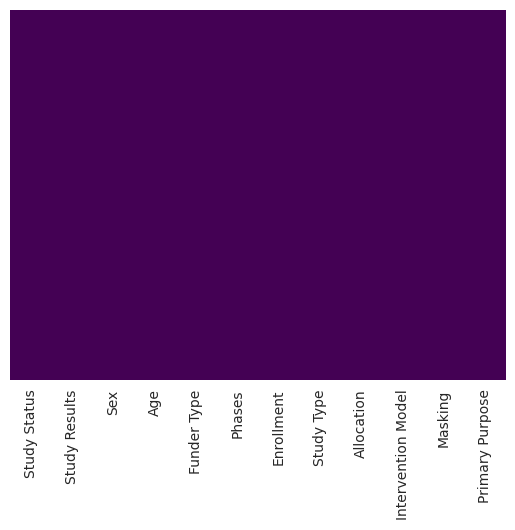

In [183]:
import seaborn as sns
sns.heatmap(balanced_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [184]:
encoded_data = balanced_data

In [185]:
#chi - square test // feature selection for categorical features only
from sklearn.feature_selection import chi2
import pandas as pd

# Assuming 'encoded_data' is already loaded as a DataFrame

# Separate features (X) and target variable (y)
X = encoded_data.drop(columns= ['Study Status','Enrollment'])  # Features
y = encoded_data["Study Status"]  # Target

# Apply Chi-Square test
chi_scores, p_values = chi2(X, y)

# Create a DataFrame to display results
chi_square_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi-Square Score": chi_scores,
    "p-Value": p_values
}).sort_values(by="p-Value")

# Display the results
print("Chi-Square Test Results:")
print(chi_square_results)



Chi-Square Test Results:
              Feature  Chi-Square Score  p-Value
9     Primary Purpose            366.17     0.00
7  Intervention Model            299.91     0.00
4              Phases            293.88     0.00
1                 Sex            277.51     0.00
8             Masking            243.73     0.00
5          Study Type            194.05     0.00
2                 Age             55.62     0.00
3         Funder Type             41.53     0.00
6          Allocation              6.92     0.01
0       Study Results              1.44     0.23


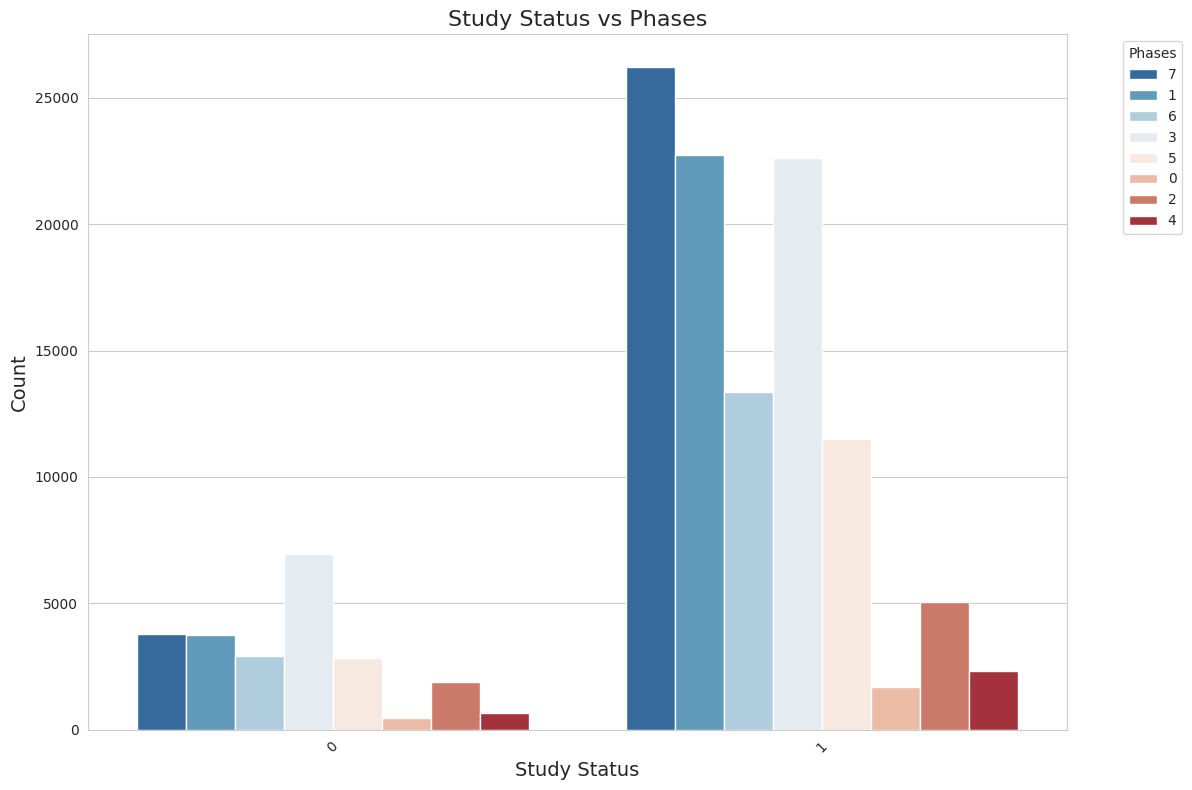

In [186]:
# Assuming 'balanced_data' is already created and available
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the column data type is consistent (convert all to strings for visualization purposes)
balanced_data['Phases'] = balanced_data['Phases'].astype(str)

# Set Seaborn style
sns.set_style('whitegrid')

# Create the countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Study Status', hue='Phases', data=balanced_data, palette='RdBu_r')

# Adjust legend
plt.legend(title='Phases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Study Status vs Phases', fontsize=16)
plt.xlabel('Study Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [187]:
# Select relevant columns for the correlation matrix
correlation_columns = ['Enrollment', 'Study Status']

# Compute the correlation matrix
correlation_matrix = encoded_data[correlation_columns].corr()

# Print the correlation of each feature with 'Study Status', sorted in descending order
print(correlation_matrix["Study Status"].sort_values(ascending=False))


Study Status   1.00
Enrollment     0.38
Name: Study Status, dtype: float64


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Define X and y based on the resampled data
X = encoded_data.drop(columns=['Study Status'])  # Features
y = encoded_data['Study Status']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)

# # Initializing the StandardScaler
# scaler = StandardScaler()

# # Fitting and transforming the scaler on the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transforming the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

# # Confirm the scaling process
# print("Training data after scaling:\n", X_train_scaled[:5])  # Display first 5 rows
# print("\nTesting data after scaling:\n", X_test_scaled[:5])  # Display first 5 rows


In [189]:
X_train.shape

(102927, 11)

In [190]:
y_train.value_counts()

Study Status
1    84361
0    18566
Name: count, dtype: int64

In [192]:
from imblearn.over_sampling import SMOTENC

# Assume encoded_data is your dataset with the specified columns
# Identify categorical and numerical columns
categorical_columns = [ 'Study Results', 'Sex', 'Age', 'Funder Type', 'Phases', 'Study Type','Allocation', 'Intervention Model', 'Masking', 'Primary Purpose']
numerical_columns = ['Enrollment']

# Separate features (X) and target (y)
X = X_train[categorical_columns + numerical_columns]
y = y_train  # Assuming Study Status is the target

# Identify categorical feature indices (based on X.columns)
categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_columns]

# Apply SMOTENC to handle both categorical and numerical data
smotenc = SMOTENC(categorical_features=categorical_feature_indices, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# Display the resampled dataset
X_resampled.head()
X_train= X_resampled
y_train = y_resampled
y_train.value_counts()


Study Status
1    84361
0    84361
Name: count, dtype: int64

In [193]:
X_train.head()

,Study Results,Sex,Age,Funder Type,Phases,Study Type,Allocation,Intervention Model,Masking,Primary Purpose,Enrollment
0,1,0,1,2,7,0,1.00,3,8,10,9.33
1,0,0,3,6,7,0,1.00,3,1,10,8.25
2,0,0,3,6,3,0,1.00,2,8,10,17.20
3,0,0,1,3,6,0,1.00,3,18,10,8.66
4,0,0,1,3,2,0,2.00,5,8,10,3.46


In [194]:
X_test.head()

,Study Results,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Allocation,Intervention Model,Masking,Primary Purpose
201829,1,0,2,3,1,5.29,0,2.00,5,8,10
95910,0,0,2,6,1,4.12,0,1.00,1,17,10
108993,0,0,1,6,2,2.24,0,2.00,5,8,10
152497,0,2,1,3,6,7.07,0,1.00,3,1,10
235450,0,0,1,6,3,11.83,0,1.00,3,8,10


In [195]:
# Define the correct column order
correct_order = [
    'Study Results', 'Sex', 'Age', 'Funder Type', 'Phases', 'Enrollment',
    'Study Type', 'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose'
]

# Reorder the columns in X_train
X_train = X_train[correct_order]

# Verify the new order
X_train.head()


,Study Results,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Allocation,Intervention Model,Masking,Primary Purpose
0,1,0,1,2,7,9.33,0,1.00,3,8,10
1,0,0,3,6,7,8.25,0,1.00,3,1,10
2,0,0,3,6,3,17.20,0,1.00,2,8,10
3,0,0,1,3,6,8.66,0,1.00,3,18,10
4,0,0,1,3,2,3.46,0,2.00,5,8,10


In [196]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Confirm the scaling process
print("Training data after scaling:\n", X_train_scaled[:5])  # Display first 5 rows
print("\nTesting data after scaling:\n", X_test_scaled[:5])  # Display first 5 rows

Training data after scaling:
 [[ 1.6927309  -0.35781211 -0.18587998 -1.91780852  1.36413056  0.72788659
  -0.26671179 -0.3070579  -0.46761752 -0.34405526  0.39446345]
 [-0.59076135 -0.35781211  1.86292236  0.7999171   1.36413056  0.49151431
  -0.26671179 -0.3070579  -0.46761752 -2.11958547  0.39446345]
 [-0.59076135 -0.35781211  1.86292236  0.7999171  -0.43383435  2.45006945
  -0.26671179 -0.3070579  -1.19233081 -0.34405526  0.39446345]
 [-0.59076135 -0.35781211 -0.18587998 -1.23837711  0.91463934  0.58203517
  -0.26671179 -0.3070579  -0.46761752  2.19241646  0.39446345]
 [-0.59076135 -0.35781211 -0.18587998 -1.23837711 -0.88332558 -0.55398312
  -0.26671179  1.26234087  0.98180908 -0.34405526  0.39446345]]

Testing data after scaling:
 [[ 1.6927309  -0.35781211  0.83852119 -1.23837711 -1.3328168  -0.15446425
  -0.26671179  1.26234087  0.98180908 -0.34405526  0.39446345]
 [-0.59076135 -0.35781211  0.83852119  0.7999171  -1.3328168  -0.40990717
  -0.26671179 -0.3070579  -1.91704411  1.93

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# RandomForestClassifier with scaled data and class weight
xg_rf_scaled = RandomForestClassifier(class_weight='balanced', random_state=42)
xg_rf_scaled.fit(X_train_scaled, y_train)

# Get predicted probabilities (output for positive class)
y_probs_rf_scaled = xg_rf_scaled.predict_proba(X_test_scaled)[:, 1]

# Apply threshold to convert probabilities into binary predictions
threshold = 0.1
y_pred_rf_scaled = (y_probs_rf_scaled > threshold).astype(int)

# Calculate F1 score
f1_rf_scaled = f1_score(y_test, y_pred_rf_scaled, average='weighted')
print("RandomForestClassifier with scaled data and class weight F1 Score:", f1_rf_scaled)


RandomForestClassifier with scaled data and class weight F1 Score: 0.8584039923825685


In [204]:
rf_preds_val = xg_rf_scaled.predict_proba(X_test_scaled)  # Probabilities from RandomForest

In [205]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (168722, 11)
y_train shape: (168722,)
X_test_scaled shape: (25732, 11)
y_test shape: (25732,)


In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf_scaled)

array([[ 2008,  2634],
       [  635, 20455]])

In [207]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred_rf_scaled)

0.8859197020226082

In [208]:
recall_score(y_test,y_pred_rf_scaled)

0.9698909435751542

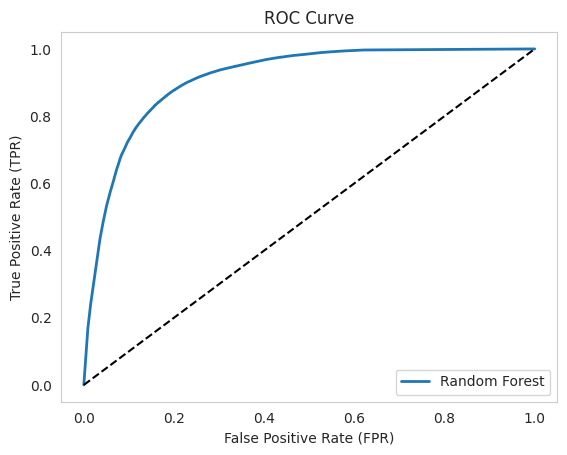

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.grid()

# Train the Random Forest model
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3, method="predict_proba")

# Extract scores and calculate ROC curve
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

# Plot the ROC curve
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [210]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores_forest)

0.9121168442672363

**HANDLING THE TEXTUAL COLUMNS**

In [211]:
novartis_data_copy["Phases"].value_counts()

Phases
Unknown          122525
PHASE2            29570
PHASE1            26486
PHASE4            16244
PHASE3            14339
PHASE1|PHASE2      6908
PHASE2|PHASE3      2961
EARLY_PHASE1       2151
Name: count, dtype: int64

In [212]:
# Fill null values in the "Phases" column with "Unknown"
novartis_data_copy["Phases"] = novartis_data_copy["Phases"].fillna("Unknown")

# Verify the changes
print(novartis_data_copy["Phases"].value_counts())


Phases
Unknown          122525
PHASE2            29570
PHASE1            26486
PHASE4            16244
PHASE3            14339
PHASE1|PHASE2      6908
PHASE2|PHASE3      2961
EARLY_PHASE1       2151
Name: count, dtype: int64


In [213]:
# Example of downsampling "Unknown"
unknown_sample = novartis_data_copy[novartis_data_copy["Phases"] == "Unknown"].sample(n=30000, random_state=42)
other_data = novartis_data_copy[novartis_data_copy["Phases"] != "Unknown"]
textual_data = pd.concat([unknown_sample, other_data])

print(balanced_data["Phases"].value_counts())

Phases
7    30000
3    29570
1    26486
6    16244
5    14339
2     6908
4     2961
0     2151
Name: count, dtype: int64


In [214]:
textual_data.head()

,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Sex,Age,Funder Type,Phases,Enrollment,Study Type,Study Design
211241,COMPLETED,The purpose of this study is to compare oxidat...,YES,HIV Infections,NaN,"Total Glutathione, The total glutathione conte...","Catalase Activity, Antioxidant activity of the...",Hospital de Clinicas de Porto Alegre,ALL,ADULT,OTHER,Unknown,5.29,OBSERVATIONAL,Observational Model: |Time Perspective: p
134970,COMPLETED,Obsessional compulsive disorder (OCD) is a ver...,NO,Obsessive Compulsive Disorder,BEHAVIORAL: Cognitive behavior therapy|BEHAVIO...,Yale-Brown Obsessive-Compulsive Scale (Y-BOCS)...,Vancouver Obsessional Compulsive Inventory (VO...,Centre de Recherche de l'Institut Universitair...,ALL,"ADULT, OLDER_ADULT",OTHER,Unknown,10.54,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...
88399,TERMINATED,Metabolic syndrome and hyperuricemia were both...,NO,Hyperuricemia|Metabolic Syndrome|Left Ventricu...,DIAGNOSTIC_TEST: hyperuricemia,Left ventricle diastolic dysfunction with elev...,"high-sensitivity C-reactive protein, determine...","National Defense Medical Center, Taiwan",ALL,"ADULT, OLDER_ADULT",OTHER,Unknown,8.19,OBSERVATIONAL,Observational Model: |Time Perspective: p
197115,COMPLETED,Clinical management of cochlear implant (CI) r...,YES,"Hearing Loss, Sensorineural|Hearing Loss, Bila...","DEVICE: Cochlear Implant (CI)-CI500 series, CI...",Number of Participants Who While Using the Fin...,NaN,Cochlear,ALL,"ADULT, OLDER_ADULT",INDUSTRY,Unknown,3.87,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...
30457,COMPLETED,"This prospective, randomized study,control stu...",NO,Laparoscopic Renal Surgery|Pain Management|Ner...,PROCEDURE: single-injection QLB(quadratus lumb...,"cumulative morphine consumption, within 48 pos...",The pain scores determined by the numeric rati...,Cui Xulei,ALL,"CHILD, ADULT, OLDER_ADULT",OTHER,Unknown,5.48,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...


In [215]:
textual_data.shape

(128659, 15)

In [216]:
import pandas as pd
from transformers import AutoTokenizer
import torch

# # Load pre-trained BioBERT tokenizer
# tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# # Textual columns in your dataset
# textual_columns = [
#     "Brief Summary",
#     "Conditions",
#     "Interventions",
#     "Primary Outcome Measures",
#     "Secondary Outcome Measures"
# ]


# # Analyze token lengths
# token_lengths = []
# for col in textual_columns:
#     tokenized = tokenizer(balanced_data[col].dropna().tolist(), truncation=False, return_length=True)
#     token_lengths.extend(tokenized["length"])

# # Display statistics
# import numpy as np
# print("Max token length:", np.max(token_lengths))
# print("Mean token length:", np.mean(token_lengths))
# print("90th percentile:", np.percentile(token_lengths, 90))


In [217]:
# Textual columns in your dataset
textual_columns = [
    "Brief Summary",
    "Conditions",
    "Interventions",
    "Primary Outcome Measures",
    "Secondary Outcome Measures"
]


In [218]:
# # Function to clean text
# def clean_text(text):
#     if pd.isna(text):  # Handle missing values
#         return ""
#     text = text.lower()  # Convert to lowercase
#     text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove special characters
#     return ' '.join(text.split())  # Remove extra whitespaces

# # Apply text cleaning to all textual columns
# for col in textual_columns:
#     balanced_data[col] = balanced_data[col].apply(clean_text)

# # Function to tokenize text in batches
# def tokenize_in_batches(column_texts, tokenizer, batch_size=100, max_length=256):
#     """
#     Tokenizes text in smaller batches to reduce memory usage.
#     """
#     tokenized_batches = []
#     for i in range(0, len(column_texts), batch_size):
#         batch = column_texts[i:i + batch_size].tolist()  # Slice the column
#         tokenized_batch = tokenizer(
#             batch,
#             padding="max_length",  # Add padding
#             truncation=True,  # Truncate if text exceeds max_length
#             max_length=max_length,  # Set maximum length for tokens
#             return_tensors="pt"  # Return PyTorch tensors
#         )
#         tokenized_batches.append(tokenized_batch)
#     # Combine all batches into a single tokenized dataset
#     return {
#         "input_ids": torch.cat([batch["input_ids"] for batch in tokenized_batches], dim=0),
#         "attention_mask": torch.cat([batch["attention_mask"] for batch in tokenized_batches], dim=0)
#     }

# # Dictionary to store tokenized outputs for each column
# tokenized_data = {}

# # Tokenize each textual column in batches
# for col in textual_columns:
#     print(f"Tokenizing column: {col} in batches")
#     tokenized_data[col] = tokenize_in_batches(balanced_data[col], tokenizer, batch_size=50, max_length=256)
#     print(f"Tokenized column: {col}")

# # Example: Inspect tokenized output for a specific column
# print(f"Tokenized 'Interventions':")
# print(f"Input IDs: {tokenized_data['Interventions']['input_ids'][:2]}")
# print(f"Attention Masks: {tokenized_data['Interventions']['attention_mask'][:2]}")

# # # Save tokenized data for each column to disk (optional)
# # for col in textual_columns:
# #     torch.save(tokenized_data[col], f"{col}_tokenized.pt")
# #     print(f"Saved tokenized data for column: {col}")


In [219]:
# # code to load the tokenized data for the textual columns from disk and avoid running the above cell (commented out)

# import torch

# # Dictionary to store loaded tokenized data
# tokenized_data = {}

# # Load tokenized data for each column from disk
# for col in textual_columns:
#     file_name = f"{col}_tokenized.pt"  # File name for the saved data
#     try:
#         tokenized_data[col] = torch.load(file_name)  # Load the data
#         print(f"Loaded tokenized data for column: {col}")
#     except FileNotFoundError:
#         print(f"File not found for column: {col}. Ensure {file_name} exists.")

# # Example: Verify the loaded data for a specific column
# print(f"Loaded 'Brief Summary' Tokenized Data:")
# print(f"Input IDs: {tokenized_data['Brief Summary']['input_ids'][:2]}")
# print(f"Attention Masks: {tokenized_data['Brief Summary']['attention_mask'][:2]}")


In [220]:
# # extracting embeddings for all the columns in textual column 

# from transformers import AutoModel, AutoTokenizer
# import torch

# # Load BioBERT model (without classification head) and tokenizer
# model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
# tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# # Move the model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def extract_embeddings(tokenized_data, batch_size=32):
#     """
#     Extracts embeddings for tokenized inputs using BioBERT.
#     Args:
#         tokenized_data (dict): Tokenized inputs (input_ids, attention_mask).
#         batch_size (int): Batch size for processing.
#     Returns:
#         torch.Tensor: Embeddings for each input.
#     """
#     input_ids = tokenized_data["input_ids"]
#     attention_mask = tokenized_data["attention_mask"]

#     dataset = torch.utils.data.TensorDataset(input_ids, attention_mask)
#     dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

#     all_embeddings = []
#     model.eval()  # Set model to evaluation mode

#     with torch.no_grad():
#         for batch in dataloader:
#             input_ids_batch, attention_mask_batch = batch
#             input_ids_batch = input_ids_batch.to(device)
#             attention_mask_batch = attention_mask_batch.to(device)

#             # Get hidden states from the model
#             outputs = model(input_ids=input_ids_batch, attention_mask=attention_mask_batch)
#             hidden_states = outputs.last_hidden_state  # Shape: [batch_size, seq_len, hidden_dim]

#             # Mean pooling to aggregate embeddings over tokens
#             embeddings = hidden_states.mean(dim=1)  # Shape: [batch_size, hidden_dim]
#             all_embeddings.append(embeddings.cpu())

#     return torch.cat(all_embeddings, dim=0)

# # Extract embeddings for all columns
# embeddings = {}
# for col in textual_columns:
#     print(f"Extracting embeddings for column: {col}")
#     embeddings[col] = extract_embeddings(tokenized_data[col])
#     print(f"Shape of embeddings for column {col}: {embeddings[col].shape}")
#     torch.save(embeddings[col], f"{col}_embeddings.pt")
#     print(f"Saved embeddings for column: {col}")

In [221]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load extracted embeddings
brief_summary_embeddings = torch.load("/kaggle/input/embeddings/Brief Summary_embeddings.pt")
conditions_embeddings = torch.load("/kaggle/input/embeddings/Conditions_embeddings.pt")
interventions_embeddings = torch.load("/kaggle/input/embeddings2/Interventions_embeddings.pt")
primary_outcome_embeddings = torch.load("/kaggle/input/embeddings2/Primary Outcome Measures_embeddings.pt")
secondary_outcome_embeddings = torch.load("/kaggle/input/embeddings2/Secondary Outcome Measures_embeddings.pt")

# Assuming 'Study Status' is the target variable
labels = textual_data["Study Status"].apply(lambda x: 1 if x == "COMPLETED" else 0).values

# Dataset class for loading embeddings and labels
class BioBERTEmbeddingDataset(Dataset):
    def __init__(self, embeddings_1, embeddings_2, embeddings_3, embeddings_4, embeddings_5, labels):
        self.embeddings_1 = embeddings_1
        self.embeddings_2 = embeddings_2
        self.embeddings_3 = embeddings_3
        self.embeddings_4 = embeddings_4
        self.embeddings_5 = embeddings_5
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "embeddings_1": self.embeddings_1[idx],
            "embeddings_2": self.embeddings_2[idx],
            "embeddings_3": self.embeddings_3[idx],
            "embeddings_4": self.embeddings_4[idx],
            "embeddings_5": self.embeddings_5[idx],
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

# Combine embeddings into a dataset
dataset = BioBERTEmbeddingDataset(
    brief_summary_embeddings,
    conditions_embeddings,
    interventions_embeddings,
    primary_outcome_embeddings,
    secondary_outcome_embeddings,
    labels,
)

# k_folds = 5
# skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Select a specific fold (e.g., fold 0) for train and validation
# selected_fold = 0
# for fold, (train_indices, val_indices) in enumerate(skf.split(range(len(dataset)), labels)):
#     if fold == selected_fold:
#         print(f"Using Fold {fold + 1}/{k_folds} for training and validation.")
        
#         # Create train and validation subsets using the indices from StratifiedKFold
#         train_data = torch.utils.data.Subset(dataset, train_indices)
#         val_data = torch.utils.data.Subset(dataset, val_indices)
#         break

# # Data loaders for the selected fold
# train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_data, batch_size=16, shuffle=False)

from sklearn.model_selection import train_test_split
train_size=0.8
# Split into train and validation sets with stratified sampling
train_indices, val_indices = train_test_split(
    range(len(dataset)),  # Use indices for stratification
    test_size=1 - train_size,
    random_state=42,
    stratify=labels,  # Stratify by labels
)

# Create stratified subsets using the indices
train_data = torch.utils.data.Subset(dataset, train_indices)
val_data = torch.utils.data.Subset(dataset, val_indices)

# Data loaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)

# Endpoints remain unchanged


# # Split into train and validation sets
# train_size = 0.8
# train_data, val_data = train_test_split(dataset, test_size=1 - train_size, random_state=42)

# # Data loaders
# train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_data, batch_size=16, shuffle=False)


Using device: cuda


<ipython-input-221-3dfacc0c5746>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  brief_summary_embeddings = torch.load("/kaggle/input/embeddings/Brief Summary_embeddings.p

In [222]:
from imblearn.over_sampling import SMOTE
import torch
from sklearn.model_selection import train_test_split
import numpy as np

# Flatten your dataset for SMOTE
def flatten_embeddings(dataset):
    embeddings = []
    labels = []

    for item in dataset:
        combined_embedding = torch.cat((
            item["embeddings_1"],
            item["embeddings_2"],
            item["embeddings_3"],
            item["embeddings_4"],
            item["embeddings_5"]
        )).numpy()
        embeddings.append(combined_embedding)
        labels.append(item["labels"].item())

    return np.array(embeddings), np.array(labels)

# Flatten the training data
X_train, y_train = flatten_embeddings(train_data)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert resampled data back to tensors
X_resampled = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled = torch.tensor(y_resampled, dtype=torch.long)

# Split resampled data into individual tensors for embeddings
embeddings_dim = brief_summary_embeddings.size(1)  # Assuming all embeddings have the same dimension
split_size = embeddings_dim

resampled_embeddings = {
    "embeddings_1": X_resampled[:, 0:split_size],
    "embeddings_2": X_resampled[:, split_size:2*split_size],
    "embeddings_3": X_resampled[:, 2*split_size:3*split_size],
    "embeddings_4": X_resampled[:, 3*split_size:4*split_size],
    "embeddings_5": X_resampled[:, 4*split_size:5*split_size],
    "labels": y_resampled,
}

# Create a new dataset with the resampled data
class ResampledBioBERTEmbeddingDataset(Dataset):
    def __init__(self, resampled_embeddings):
        self.embeddings_1 = resampled_embeddings["embeddings_1"]
        self.embeddings_2 = resampled_embeddings["embeddings_2"]
        self.embeddings_3 = resampled_embeddings["embeddings_3"]
        self.embeddings_4 = resampled_embeddings["embeddings_4"]
        self.embeddings_5 = resampled_embeddings["embeddings_5"]
        self.labels = resampled_embeddings["labels"]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "embeddings_1": self.embeddings_1[idx],
            "embeddings_2": self.embeddings_2[idx],
            "embeddings_3": self.embeddings_3[idx],
            "embeddings_4": self.embeddings_4[idx],
            "embeddings_5": self.embeddings_5[idx],
            "labels": self.labels[idx],
        }

resampled_train_dataset = ResampledBioBERTEmbeddingDataset(resampled_embeddings)

# Resampled train loader
train_loader = DataLoader(resampled_train_dataset, batch_size=16, shuffle=True)

In [223]:
import torch
from torch import nn
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


# Load BioBERT
model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-base-cased-v1.1", num_labels=2)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [224]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


def train(model, train_loader, val_loader, optimizer, loss_fn, device, epochs=3, threshold=0.5):
    biobert_preds_train = []  # Placeholder for all training predictions
    biobert_preds_val = []    # Placeholder for all validation predictions
    # val_labels_all = []   # Placeholder for all validation labels
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        
        # Training phase
        model.train()
        train_loss = 0
        correct = 0
        all_preds = []
        all_labels = []

        
        for batch in train_loader:
            optimizer.zero_grad()
            
            # Move data to device
            embeddings_1 = batch["embeddings_1"].to(device)  # First column's embeddings
            embeddings_2 = batch["embeddings_2"].to(device)  # Second column's embeddings
            embeddings_3 = batch["embeddings_3"].to(device)  # Third column's embeddings
            embeddings_4 = batch["embeddings_4"].to(device)  # Fourth column's embeddings
            embeddings_5 = batch["embeddings_5"].to(device)  # Fifth column's embeddings
            labels = batch["labels"].to(device)  # Target labels
            
            # Forward pass: Compute logits from the model
            logits_1 = model.classifier(embeddings_1)  # Use the classification head
            logits_2 = model.classifier(embeddings_2)
            logits_3 = model.classifier(embeddings_3)
            logits_4 = model.classifier(embeddings_4)
            logits_5 = model.classifier(embeddings_5)
            
            # Average the logits from both columns
            logits = (logits_1 + logits_2 + logits_3 + logits_4 + logits_5) / 5

            # Apply sigmoid to convert logits to probabilities
            preds_train = torch.sigmoid(logits).detach().cpu().numpy()
            biobert_preds_train.extend(preds_train)  # Store predictions

            # Apply threshold for predictions
            preds = (preds_train > threshold) # 1 if prob > threshold, else 0
            
            # Compute loss
            loss = loss_fn(logits, labels)  
            train_loss += loss.item()
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Calculate accuracy
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            
            # Track predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        
        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = correct / len(train_loader.dataset)
        train_f1 = f1_score(all_labels, all_preds, average="binary")
        
        print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}")
        
        # Validation phase
        model.eval()
        val_loss = 0
        correct = 0
        val_preds = []
        val_labels = []
        biobert_preds_val = []  # Reset at the start of each epoch's validation phase

        
        with torch.no_grad():
            for batch in val_loader:
                embeddings_1 = batch["embeddings_1"].to(device)  # First column's embeddings
                embeddings_2 = batch["embeddings_2"].to(device)  # Second column's embeddings
                embeddings_3 = batch["embeddings_3"].to(device)  # Third column's embeddings
                embeddings_4 = batch["embeddings_4"].to(device)  # Fourth column's embeddings
                embeddings_5 = batch["embeddings_5"].to(device)  # Fifth column's embeddings
                labels = batch["labels"].to(device)
                
                # Forward pass: Compute logits from the model
                logits_1 = model.classifier(embeddings_1)
                logits_2 = model.classifier(embeddings_2)
                logits_3 = model.classifier(embeddings_3)
                logits_4 = model.classifier(embeddings_4)
                logits_5 = model.classifier(embeddings_5)
                
                # Average the logits from both columns
                logits = (logits_1 + logits_2 + logits_3 + logits_4 + logits_5) / 5

                # Apply sigmoid to convert logits to probabilities
                preds_val = torch.sigmoid(logits).detach().cpu().numpy()
                biobert_preds_val.extend(preds_val)  # Store predictions

                # Apply threshold for predictions
                preds = (preds_val > threshold)
                
                # Compute loss
                loss = loss_fn(logits, labels)
                val_loss += loss.item()
                
                # Calculate accuracy
                preds = torch.argmax(logits, dim=1)
                correct += (preds == labels).sum().item()
                
                # Track predictions and labels
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct / len(val_loader.dataset)
        val_f1 = f1_score(val_labels, val_preds, average="binary")
        auc_roc = roc_auc_score(val_labels, val_preds)
        conf_matrix = confusion_matrix(val_labels, val_preds)
        y_val=np.array(val_labels)
        
        # Print metrics
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}, AUC-ROC: {auc_roc:.4f}")
        print(f"Confusion Matrix:\n{conf_matrix}")

    return biobert_preds_train, biobert_preds_val,y_val

# Train the model
biobert_preds_train, biobert_preds_val,y_val =  train(model, train_loader, val_loader, optimizer, loss_fn, device, epochs=5,threshold=0.3)


Epoch 1/5
Train Loss: 0.6632, Train Accuracy: 0.6140, F1 Score: 0.6201
Validation Loss: 0.6509, Validation Accuracy: 0.6453, F1 Score: 0.7560, AUC-ROC: 0.6009
Confusion Matrix:
[[ 2467  2175]
 [ 6952 14138]]
Epoch 2/5
Train Loss: 0.6443, Train Accuracy: 0.6363, F1 Score: 0.6424
Validation Loss: 0.6427, Validation Accuracy: 0.6438, F1 Score: 0.7534, AUC-ROC: 0.6083
Confusion Matrix:
[[ 2566  2076]
 [ 7090 14000]]
Epoch 3/5
Train Loss: 0.6372, Train Accuracy: 0.6448, F1 Score: 0.6454
Validation Loss: 0.6487, Validation Accuracy: 0.6267, F1 Score: 0.7361, AUC-ROC: 0.6114
Confusion Matrix:
[[ 2727  1915]
 [ 7692 13398]]
Epoch 4/5
Train Loss: 0.6327, Train Accuracy: 0.6491, F1 Score: 0.6460
Validation Loss: 0.6249, Validation Accuracy: 0.6525, F1 Score: 0.7613, AUC-ROC: 0.6105
Confusion Matrix:
[[ 2529  2113]
 [ 6829 14261]]
Epoch 5/5
Train Loss: 0.6294, Train Accuracy: 0.6521, F1 Score: 0.6470
Validation Loss: 0.6424, Validation Accuracy: 0.6288, F1 Score: 0.7371, AUC-ROC: 0.6182
Confusion

In [225]:
len(biobert_preds_val)

25732

In [226]:
y_val

array([1, 1, 1, ..., 0, 1, 1])

In [234]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

w1=1
w2=1
# Step 2: Combine Predictions for Validation Set
# Combine probabilities from both models
combined_preds_val = (w1*rf_preds_val + w2*biobert_preds_val) / (w1+w2)  # Soft voting by averaging

# Step 3: Make Predictions
threshold = 0.5  # Set your desired threshold (0.5 or other value)

# Step 3: Make Predictions using the threshold
# Convert probabilities to class labels based on the threshold
final_preds_val = (combined_preds_val[:, 1] > threshold).astype(int)  # Apply threshold to positive class probabilities

# Step 4: Evaluate the Ensemble Model
accuracy = accuracy_score(y_val, final_preds_val)
f1 = f1_score(y_val, final_preds_val, average='weighted')  # You can use 'binary' or 'weighted' depending on your needs
auc_roc = roc_auc_score(y_val, combined_preds_val[:, 1])  # AUC-ROC score based on positive class probabilities
precision = precision_score(y_val, final_preds_val)  # Precision score
recall = recall_score(y_val, final_preds_val)  # Recall score

# Print the results
print(f"Ensemble Model Validation Accuracy: {accuracy:.4f}")
print(f"Ensemble Model Validation F1 Score: {f1:.4f}")
print(f"Ensemble Model Validation AUC-ROC Score: {auc_roc:.4f}")
print(f"Ensemble Model Validation Precision: {precision:.4f}")
print(f"Ensemble Model Validation Recall: {recall:.4f}")
  # Use 'weighted' or 'binary' as needed
# auc_roc = roc_auc_score(y_val, positive_probs)  # Calculate AUC-ROC score

# # Step 5: Plot ROC Curve
# fpr, tpr, thresholds = roc_curve(y_val, positive_probs)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f"AUC-ROC = {auc_roc:.4f}")
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()

# print(f"Ensemble Model Validation Accuracy: {accuracy:.4f}")
# print(f"Ensemble Model Validation F1 Score: {f1:.4f}")
# print(f"Ensemble Model Validation AUC-ROC Score: {auc_roc:.4f}")


Ensemble Model Validation Accuracy: 0.8112
Ensemble Model Validation F1 Score: 0.8207
Ensemble Model Validation AUC-ROC Score: 0.8214
Ensemble Model Validation Precision: 0.9137
Ensemble Model Validation Recall: 0.8500
